[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


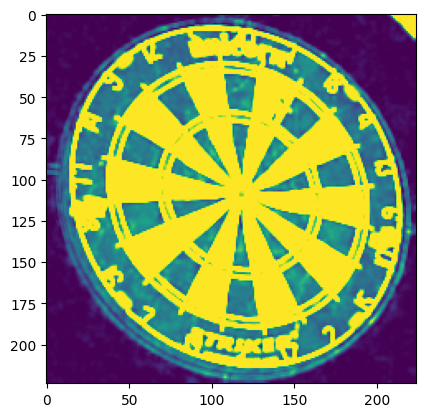

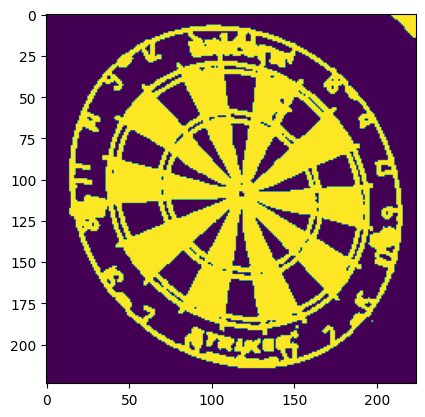

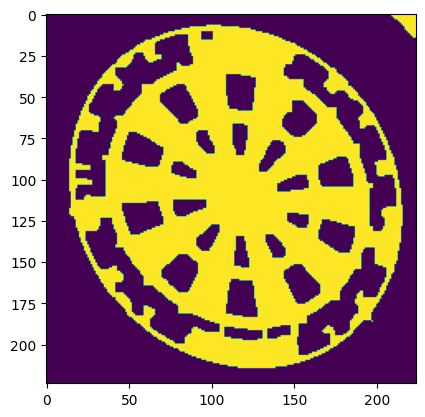

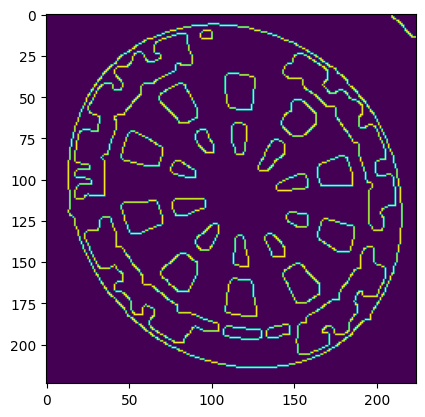

True

In [1]:
import cv2
from matplotlib import image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def get_normalized_size(center_of_mass, image_width, image_height):
    # print(center_of_mass, image_width, image_height)
    normalized_width = (center_of_mass[0] / (image_width / 100)) / 100
    normalized_height = (center_of_mass[1] / (image_height / 100)) / 100
    return normalized_width, normalized_height
    

# imagePath = './Screenshot_2.png'
imagePath = './result4.png'
image = Image.open(imagePath).convert('RGB')
width, height = image.size

color = cv2.imread(imagePath, cv2.IMREAD_COLOR)
imCalHSV = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)


kernel = np.ones((3, 3), np.float32) /1
print(kernel)
blur = cv2.filter2D(color, -1, kernel)
h, s, imCal = cv2.split(blur)
used = h
plt.imshow(used)
plt.show()

## threshold important -> make accessible
#ret, thresh = cv2.threshold(imCal, 140, 255, cv2.THRESH_BINARY_INV)
ret, thresh = cv2.threshold(used, 254, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

## kernel size important -> make accessible
# very important -> removes lines outside the outer ellipse -> find ellipse
kernel = np.ones((5, 5), np.uint8)
thresh2 = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(thresh2)
plt.show()

cv2.imwrite('filtered.png', thresh2)

def autocanny(imCal):
    edged = cv2.Canny(imCal, 250, 255)
    return edged
    
edges =autocanny(thresh2)
# Save the edge detected image
plt.imshow(edges)
plt.show()
cv2.imwrite('edges.png', edges)

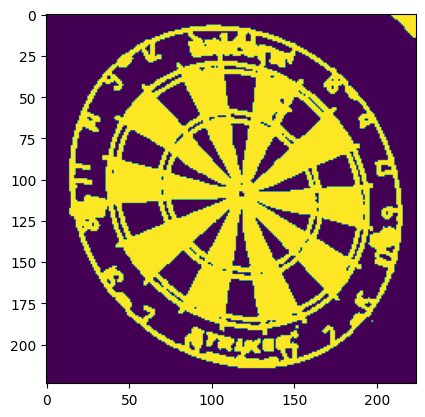

[[[209   0]]

 [[223  14]]

 [[223   0]]]


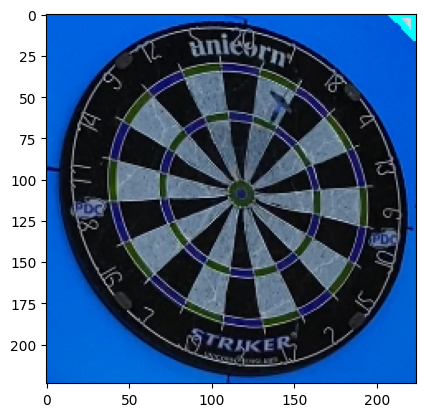

(0.509892702102661, 0.49252125195094515)
0


In [103]:
img = cv2.imread("edges.png", 0)
img2 = cv2.imread(imagePath)

used = thresh
plt.imshow(used)
plt.show()

contours, hierarchy = cv2.findContours(used, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE )

minThresE = 1000
maxThresE = 1500000/4

ellipseWidth = 0
center_ellipse = None
elipse = None
## contourArea threshold important -> make accessible
triangles = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.09*cv2.arcLength(cnt, True), True)
    if len(approx) == 3:
        print(approx)
        triangles.append(approx)
        img2 = cv2.drawContours(img2, [cnt], -1, (0,255,255), 3)
        
    # if minThresE < cv2.contourArea(cnt) < maxThresE:
    #     elipse = cv2.fitEllipse(cnt)
    #     cv2.ellipse(img, elipse, (15, 15, 0), 2)

    #     x, y = elipse[0]
    #     a, b = elipse[1]
    #     angle = elipse[2]
    #     print(x,y,width,height, elipse)

    #     center_ellipse = (x, y)

    #     coordinates = get_normalized_size((x,y),img.shape[0], img.shape[1])
    #     ellipseWidth = int(max(elipse[1]))  # Width is the larger of the two axis lengths

    #     a = a / 2
    #     b = b / 2

    #     cv2.ellipse(img2, elipse,(255, 255, 255), 1)

# largest_triangle = max(triangles, key=cv2.contourArea)
# img2 = cv2.drawContours(img2, [largest_triangle], -1, (0,255,255), 3)
plt.imshow(img2)
plt.show()
cv2.imwrite("result2.png", img)
print(coordinates)

print(ellipseWidth)
halfWidth = int(ellipseWidth/2)

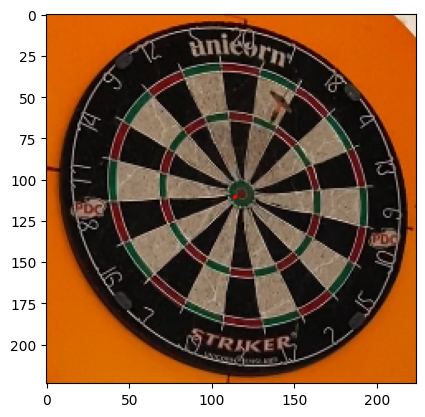

In [59]:
from matplotlib import image as mpimg
plt.imshow(mpimg.imread(imagePath))
plt.scatter(center_ellipse[0], center_ellipse[1], s=10, marker='+', color="red")
plt.show()

In [4]:
# x = int(center_ellipse[0])
# y = int(center_ellipse[1])
# print(x,y, halfWidth)
# img = cv2.imread("./darts/Screenshot_2.png")
# crop_img = img[y-halfWidth:y+halfWidth, x-halfWidth:x+halfWidth]

# cv2.imwrite("./result4.png", crop_img)

# plt.imshow(mpimg.imread("./result4.png"))
# plt.show()

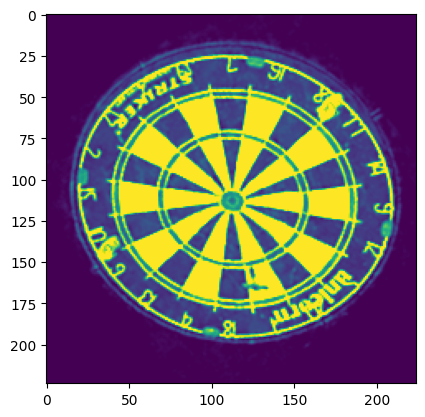

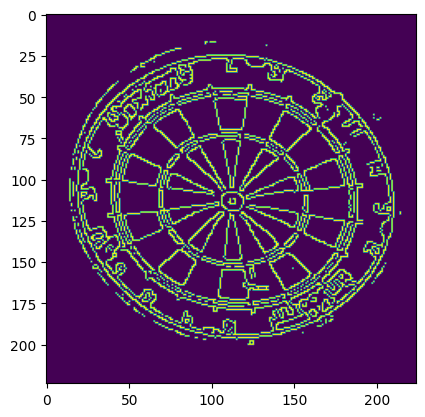

[[[-3.8000000e+01  2.6005406e+00]]

 [[ 1.5900000e+02  8.2030475e-01]]

 [[ 6.0000000e+00  2.3212879e+00]]

 [[ 5.7000000e+01  1.9896753e+00]]

 [[-1.0000000e+00  2.3561945e+00]]

 [[ 3.0000000e+00  2.3387411e+00]]

 [[ 1.0000000e+00  2.3561945e+00]]

 [[-3.6000000e+01  2.5830872e+00]]

 [[ 5.5000000e+01  2.0071287e+00]]

 [[ 1.5800000e+02  7.8539819e-01]]

 [[ 1.2700000e+02  1.3962634e-01]]

 [[ 1.2800000e+02  1.4311700e+00]]]
-997 -1733
-1354 1480
-1466 -1359
-1850 -761
-1413 -1414
-1440 -1387
-1414 -1413
-1029 -1715
-1835 -795
-1302 1525
-152 1998
-1962 405


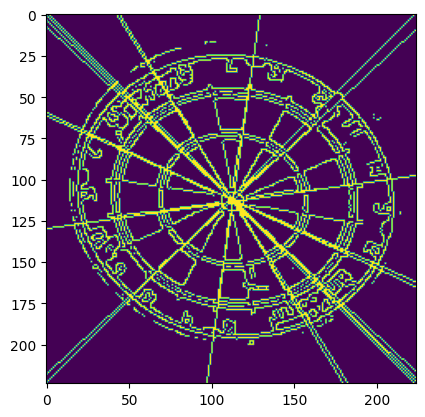

In [5]:
color = cv2.imread("warped.png", cv2.IMREAD_COLOR)
imCalHSV = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
kernel = np.ones((2, 2), np.float32) /1
blur = cv2.filter2D(color, -1, kernel)
h, s, imCal = cv2.split(blur)
plt.imshow(h)
plt.show()

edges =autocanny(h)
# Save the edge detected image
plt.imshow(edges)
plt.show()

lines = cv2.HoughLines(edges, 1, np.pi / 180, 80, 130)
print(lines)

## sector angles important -> make accessible
for line in lines:
# split between horizontal and vertical lines (take only lines in certain range)
    for rho, theta in line:
# split between horizontal and vertical lines (take only lines in certain range)
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 2000 * (-b))
        y1 = int(y0 + 2000 * (a))
        x2 = int(x0 - 2000 * (-b))
        y2 = int(y0 - 2000 * (a))
        print(x1,y1)
        cv2.line(edges, (x1, y1), (x2, y2), (255, 255, 255), 1)

plt.imshow(edges)
plt.show()


In [6]:
from collections import defaultdict

def segment_by_angle_kmeans(lines, k=2, **kwargs):
   """Groups lines based on angle with k-means."""

   default_criteria_type = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER
   criteria = kwargs.get('criteria', (default_criteria_type, 10, 1.0))
   flags = kwargs.get('flags', cv2.KMEANS_RANDOM_CENTERS)
   attempts = kwargs.get('attempts', 10)

   angles = np.array([line[0][1] for line in lines])
   pts = np.array([[np.cos(2*angle), np.sin(2*angle)] for angle in angles], dtype=np.float32)

   labels, centers = cv2.kmeans(pts, k, None, criteria, attempts, flags)[1:]
   labels = labels.reshape(-1)

   segmented = defaultdict(list)
   for i, line in enumerate(lines):
       segmented[labels[i]].append(line)
   segmented = list(segmented.values())
   return segmented

def intersection(line1, line2):
   rho1, theta1 = line1[0]
   rho2, theta2 = line2[0]
   A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
   b = np.array([[rho1], [rho2]])
   x0, y0 = np.linalg.solve(A, b)
   x0, y0 = int(np.round(x0).item()), int(np.round(y0).item())
   return [[x0, y0]]

def segmented_intersections(lines):
   intersections = []
   for i, group in enumerate(lines[:-1]):
       for next_group in lines[i+1:]:
           for line1 in group:
               for line2 in next_group:
                  intersections.append(intersection(line1, line2))
   return intersections

# Segment the lines
segmented = segment_by_angle_kmeans(lines)

# Find the intersections
intersections = segmented_intersections(segmented)
coords_array = np.array(intersections)
avg_x = np.mean(coords_array[:, 0, 0])
avg_y = np.mean(coords_array[:, 0, 1])
print(avg_x,avg_y)

112.28125 112.53125


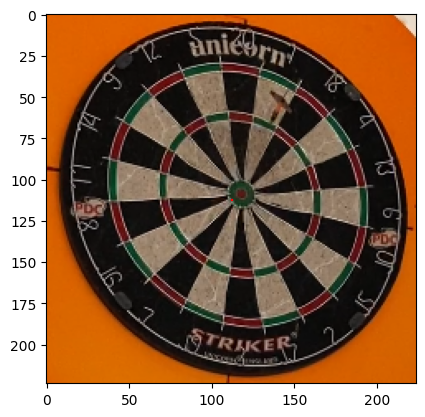

In [7]:
from matplotlib import image as mpimg
plt.imshow(mpimg.imread("./darts/result4.png"))
plt.scatter(avg_x, avg_y, s=1, marker='+', color="red")
plt.show()

In [104]:
ellipse_center = tuple(map(int, elipse[0])) 
# ellipse_center = (int(avg_x),int(avg_y))
major_axis = int(elipse[1][0])  # Major axis length
minor_axis = int(elipse[1][1])  # Minor axis length
rotation_angle = elipse[2]  # Angle of rotation

# Calculate the scaling factor to turn the ellipse into a circle
scaling_factor = major_axis / minor_axis

# Create an affine transformation matrix
M = cv2.getRotationMatrix2D(ellipse_center, -rotation_angle, scaling_factor)

img = cv2.imread(imagePath)
# Apply the transformation to the original image
transformed_image = cv2.warpAffine(img, M, (width, height))
plt.imshow(transformed_image)
plt.show()
cv2.imwrite("warped.png", transformed_image)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
from matplotlib import image as mpimg
plt.imshow(mpimg.imread("warped.png"))
plt.scatter(avg_x, avg_y, s=1, marker='+', color="red")
plt.show()

In [ ]:
# mask = np.zeros_like(transformed_image, dtype=np.uint8)

# # Define the center and radius of the dartboard (in your case, the transformed circle)
# circle_center = (int(avg_x),int(avg_y))
# circle_radius = int(major_axis / 2)  # Assuming the circle is a transformed ellipse

# # Create a blank canvas with the same dimensions as the transformed image
# num_rings = 10  # Number of rings
# num_sectors = 20  # Number of sectors
# ring_spacing = circle_radius / num_rings

# # Overlay polar system on the blank canvas
# for r in range(1, num_rings + 1):
#     cv2.circle(overlay, circle_center, int(r * ring_spacing), (0, 255, 0), 2)

# for s in range(num_sectors):
#     angle = (360 / num_sectors) * s
#     radians = np.deg2rad(angle)
#     x1 = int(circle_center[0] + circle_radius * np.cos(radians))
#     y1 = int(circle_center[1] + circle_radius * np.sin(radians))
#     cv2.line(overlay, circle_center, (x1, y1), (0, 255, 0), 2)

# # Add the overlay to the transformed image
# result_image = cv2.addWeighted(transformed_image, 1, overlay, 0.5, 0)

# # Display the result using Matplotlib
# plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

In [ ]:
image = cv2.imread('warped.png')

# Create a blank canvas for the polar grid
polar_canvas = np.zeros_like(image)

# Define the center and radius of the dartboard in the image
center = (int(avg_x),int(avg_y))
radius = min(center)

# Define the number of circles in the polar grid
num_circles = 5

# Create a polar grid
for i in range(1, num_circles + 1):
    cv2.circle(polar_canvas, center, int(radius * i / num_circles), (0, 0, 255), 2)

# Define the number of sectors in the dartboard
num_sectors = 20

# Create sector lines
for i in range(num_sectors):
    angle = i * (360 / num_sectors)
    radian = np.deg2rad(angle)
    end_point = (int(center[0] + radius * np.cos(radian)), int(center[1] + radius * np.sin(radian)))
    cv2.line(polar_canvas, center, end_point, (0, 0, 255), 2)

# Convert the polar canvas to a transparent overlay
overlay = polar_canvas.copy()
overlay[polar_canvas == 0] = 0  # Set non-red pixels to transparent

# Overlay the polar grid on the image
result = cv2.addWeighted(image, 1, overlay, 0.5, 0)

# Display the result
cv2.imwrite("result22.png", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread("./darts/result4.png")

# Create a blank canvas for the polar grid
polar_canvas = np.zeros_like(image)

# Define the center and radius of the dartboard in the image
center = (int(avg_x),int(avg_y))
radius = min(center)

# Define the number of circles in the polar grid
num_circles = 5

# Create a polar grid
for i in range(1, num_circles + 1):
    cv2.circle(polar_canvas, center, int(radius * i / num_circles), (0, 0, 255), 2)

# Define the number of sectors in the dartboard
num_sectors = 20

# Create sector lines
for i in range(num_sectors):
    angle = i * (360 / num_sectors)
    radian = np.deg2rad(angle)
    end_point = (int(center[0] + radius * np.cos(radian)), int(center[1] + radius * np.sin(radian)))
    cv2.line(polar_canvas, center, end_point, (0, 0, 255), 2)

# Convert the polar canvas to a transparent overlay
overlay = polar_canvas.copy()
overlay[polar_canvas == 0] = 0  # Set non-red pixels to transparent

# Overlay the polar grid on the image
result = cv2.addWeighted(image, 1, overlay, 0.5, 0)

# Display the result
cv2.imwrite("result44.png", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
def transform(xy, img=None, angle=9, M=None):
    """takes 2D coordinates, applies a perspective transformation to them (and an associated image if provided), and returns the transformed coordinates and image."""
    if xy.shape[-1] == 3:
        has_vis = True
        vis = xy[:, 2:]
        xy = xy[:, :2]
    else:
        has_vis = False

    if img is not None and np.mean(xy[:4]) < 1:
        print("asd")
        h, w = img.shape[:2]
        print(h, w)
        xy[:, 0] *= w
        xy[:, 1] *= h
        print(xy)

    if M is None:
        c, r = get_circle(xy)  # not necessarily a circle
        # c is center of 4 calibration points, r is mean distance from center to calibration points

        src_pts = xy[:4].astype(np.float32)
        dst_pts = np.array([
            [c[0] - r * np.sin(np.deg2rad(angle)), c[1] - r * np.cos(np.deg2rad(angle))],
            [c[0] + r * np.sin(np.deg2rad(angle)), c[1] + r * np.cos(np.deg2rad(angle))],
            [c[0] - r * np.cos(np.deg2rad(angle)), c[1] + r * np.sin(np.deg2rad(angle))],
            [c[0] + r * np.cos(np.deg2rad(angle)), c[1] - r * np.sin(np.deg2rad(angle))]
        ]).astype(np.float32)
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)

    xyz = np.concatenate((xy, np.ones((xy.shape[0], 1))), axis=-1).astype(np.float32)
    xyz_dst = np.matmul(M, xyz.T).T
    xy_dst = xyz_dst[:, :2] / xyz_dst[:, 2:]

    if img is not None:
        img = cv2.warpPerspective(img.copy(), M, (img.shape[1], img.shape[0]))
        xy_dst /= [[w, h]]

    if has_vis:
        xy_dst = np.concatenate([xy_dst, vis], axis=-1)
    return xy_dst, img, M

def get_circle(xy):
    """calculates the center and radius of a circle that best fits a given set of coordinates"""
    c = np.mean(xy[:4], axis=0)
    r = np.mean(np.linalg.norm(xy[:4] - c, axis=-1))
    return c, r

In [70]:
# used to convert dart angle to board number
BOARD_DICT = {
    0: '13', 1: '4', 2: '18', 3: '1', 4: '20', 5: '5', 6: '12', 7: '9', 8: '14', 9: '11',
    10: '8', 11: '16', 12: '7', 13: '19', 14: '3', 15: '17', 16: '2', 17: '15', 18: '10', 19: '6'
}
def board_radii(r_d, cfg):
    r_t = r_d * (cfg.board.r_treble / cfg.board.r_double)  # treble radius, in px
    r_ib = r_d * (cfg.board.r_inner_bull / cfg.board.r_double)  # inner bull radius, in px
    r_ob = r_d * (cfg.board.r_outer_bull / cfg.board.r_double) # outer bull radius, in px
    w_dt = cfg.board.w_double_treble * (r_d / cfg.board.r_double)  # width of double and treble
    return r_t, r_ob, r_ib, w_dt

def draw(img, xy, cfg, circles, score, color=(255, 255, 0)):
    xy = np.array(xy)
    if xy.shape[0] > 7:
        xy = xy.reshape((-1, 2))
    if np.mean(xy) < 1:
        h, w = img.shape[:2]
        xy[:, 0] *= w
        xy[:, 1] *= h
    if xy.shape[0] >= 4 and circles:
        img = draw_circles(img, xy, cfg)
    if xy.shape[0] > 4 and score:
        scores = get_dart_scores(xy, cfg)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 2
    line_type = 1
    for i, [x, y] in enumerate(xy):
        if i < 4:
            c = (0, 255, 0)  # green
        else:
            c = color  # cyan
        x = int(round(x))
        y = int(round(y))
        if i >= 4:
            cv2.circle(img, (x, y), 1, c, 1)
            if score:
                txt = str(scores[i - 4])
            else:
                txt = str(i + 1)
            cv2.putText(img, txt, (x + 8, y), font,
                    font_scale, c, line_type)
        else:
            cv2.circle(img, (x, y), 1, c, 10)
            cv2.putText(img, str(i + 1), (x + 8, y), font,
                        font_scale, c, line_type)
    return img

def get_dart_scores(xy, cfg, numeric=False):
    valid_cal_pts = xy[:4][(xy[:4, 0] > 0) & (xy[:4, 1] > 0)]
    if xy.shape[0] <= 4 or valid_cal_pts.shape[0] < 4:  # missing calibration point
        return []
    xy, _, _ = transform(xy.copy(), angle=0)
    print(f"transform: {xy}")
    c, r_d = get_circle(xy)
    print(f"get_circle: {c, r_d}")
    r_t, r_ob, r_ib, w_dt = board_radii(r_d, cfg)
    print(f"board_radii: { r_t, r_ob, r_ib, w_dt}")
    xy -= c
    print(f"xy -= c: { xy}")
    angles = np.arctan2(-xy[4:, 1], xy[4:, 0]) / np.pi * 180
    print(f"angles = np.arctan2(-xy[4:, 1], xy[4:, 0]) / np.pi * 180: { angles}")
    angles = [a + 360 if a < 0 else a for a in angles]  # map to 0-360
    print(f"angles = [a + 360 if a < 0 else a for a in angles]: { angles}")
    distances = np.linalg.norm(xy[4:], axis=-1)
    print(f"distances: { distances}")
    scores = []
    for angle, dist in zip(angles, distances):
        if dist > r_d:
            scores.append('0')
        elif dist <= r_ib:
            scores.append('DB')
        elif dist <= r_ob:
            scores.append('B')
        else:
            number = BOARD_DICT[int(angle / 18)]
            if dist <= r_d and dist > r_d - w_dt:
                scores.append('D' + number)
            elif dist <= r_t and dist > r_t - w_dt:
                scores.append('T' + number)
            else:
                scores.append(number)
    if numeric:
        for i, s in enumerate(scores):
            if 'B' in s:
                if 'D' in s:
                    scores[i] = 50
                else:
                    scores[i] = 25
            else:
                if 'D' in s or 'T' in s:
                    scores[i] = int(s[1:])
                    scores[i] = scores[i] * 2 if 'D' in s else scores[i] * 3
                else:
                    scores[i] = int(s)
    return scores

In [71]:
from yacs.config import CfgNode as CN
import os.path as osp
cfg = CN(new_allowed=True)
cfg.merge_from_file(osp.join('configurations', 'board.yaml'))

[[0.47321429 0.13392857]
 [0.58482143 0.84821429]
 [0.16964286 0.50446429]
 [0.86607143 0.46875   ]
 [0.60714286 0.29464286]]

asd
224 224
[[106.  30.]
 [131. 190.]
 [ 38. 113.]
 [194. 105.]
 [136.  66.]]
[[0.5234375  0.13374223]
 [0.5234375  0.84393638]
 [0.16834044 0.48883929]
 [0.87853459 0.48883929]
 [0.63547345 0.30086415]]


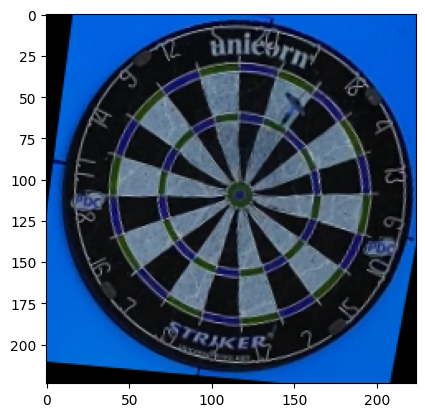

transform: [[0.5234375  0.13374223]
 [0.5234375  0.84393632]
 [0.16834044 0.4888393 ]
 [0.87853455 0.4888393 ]
 [0.63547346 0.30086418]]
get_circle: (array([0.5234375 , 0.48883929]), 0.355097051482781)
board_radii: (0.22433778428970985, 0.03321201834456598, 0.013263919275974465, 0.02088806185192829)
xy -= c: [[-9.52262713e-11 -3.55097059e-01]
 [ 1.06373010e-09  3.55097037e-01]
 [-3.55097055e-01  1.07599737e-08]
 [ 3.55097054e-01  1.13368221e-08]
 [ 1.12035956e-01 -1.87975106e-01]]
angles = np.arctan2(-xy[4:, 1], xy[4:, 0]) / np.pi * 180: [59.20442963]
angles = [a + 360 if a < 0 else a for a in angles]: [59.20442962543837]
distances: [0.21883029]
['T1']


In [83]:
image = cv2.imread("result4.png")
#Manual calibration of base2
center_center = get_normalized_size((118,109),224,224)
left_middle = get_normalized_size((38,113),224,224)
right_middle = get_normalized_size((194,105),224,224)
center_bottom = get_normalized_size((131,190),224,224)
center_top = get_normalized_size((106,30),224,224)
dart1 = get_normalized_size((136,66),224,224)

pointCoordinates = np.array([
    #1point coordinates
    [center_top[0],center_top[1]],
    #2point coordinates
    [center_bottom[0],center_bottom[1]],
    #3point coordinates
    [left_middle[0],left_middle[1]],
    #4point coordinates
    [right_middle[0],right_middle[1]],

    [dart1[0],dart1[1]],
])
print(pointCoordinates)
print()

xy_dst, img, _ = transform(pointCoordinates.copy(),image, angle=0)
print(xy_dst)
cv2.imwrite("warped.png", img)
plt.imshow(img)
plt.show()

score = get_dart_scores(pointCoordinates,cfg)
print(score)
                                                                                                                                                                                                               

[[0.42310664 0.13575494]
 [0.56734854 0.87106287]
 [0.14695005 0.58255023]
 [0.86175591 0.41119775]
 [0.51202047 0.75460321]
 [0.51411039 0.30764008]
 [0.25911605 0.60749048]]

transform: [[399.83221363 103.22096258]
 [399.83221499 697.00537156]
 [102.94003294 400.11315916]
 [696.7244276  400.11315957]
 [374.17436972 599.29759271]
 [445.37278942 255.77306236]
 [192.50823321 440.80625239]]
get_circle: (array([399.83222229, 400.11316322]), 296.8922009089373)
board_radii: (187.5660139859992, 27.76815290854178, 11.08979691630442, 17.464247112290426)
xy -= c: [[-8.66054472e-06 -2.96892201e+02]
 [-7.30017018e-06  2.96892208e+02]
 [-2.96892189e+02 -4.05707249e-06]
 [ 2.96892205e+02 -3.64782380e-06]
 [-2.56578526e+01  1.99184429e+02]
 [ 4.55405671e+01 -1.44340101e+02]
 [-2.07323989e+02  4.06930892e+01]]
angles = np.arctan2(-xy[4:, 1], xy[4:, 0]) / np.pi * 180: [ -97.34010952   72.48905772 -168.89527928]
angles = [a + 360 if a < 0 else a for a in angles]: [262.6598904782697, 72.4890577200198, 1

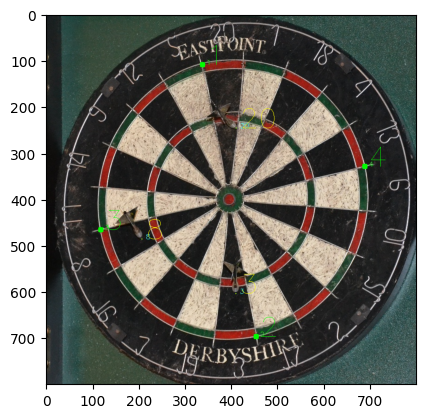

In [78]:
image = cv2.imread("DSC_0001.JPG")
#Manual calibration of base2
pointCoordinates = np.array([[0.42310664, 0.13575494],
 [0.56734854, 0.87106287],
 [0.14695005, 0.58255023],
 [0.86175591, 0.41119775],
 [0.51202047, 0.75460321],
 [0.51411039, 0.30764008],
 [0.25911605, 0.60749048]])
print(pointCoordinates)
print()

# xy_dst, img, _ = transform(pointCoordinates.copy(),image, angle=0)
# print(xy_dst)
# plt.imshow(img)
# plt.show()


# print(f"transform: {xy}")
# c, r_d = get_circle(xy)
# print(f"get_circle: {c, r_d}")
# r_t, r_ob, r_ib, w_dt = board_radii(r_d, cfg)
# print(f"board_radii: { r_t, r_ob, r_ib, w_dt}")
# xy -= c
# print(f"xy -= c: { xy}")
# angles = np.arctan2(-xy[4:, 1], xy[4:, 0]) / np.pi * 180
# print(f"angles = np.arctan2(-xy[4:, 1], xy[4:, 0]) / np.pi * 180: { angles}")
# angles = [a + 360 if a < 0 else a for a in angles]  # map to 0-360
# print(f"angles = [a + 360 if a < 0 else a for a in angles]: { angles}")
# distances = np.linalg.norm(xy[4:], axis=-1)
# print(f"distances: { distances}")
# scores = []
# for angle, dist in zip(angles, distances):
#     if dist > r_d:
#         scores.append('0')
#     elif dist <= r_ib:
#         scores.append('DB')
#     elif dist <= r_ob:
#         scores.append('B')
#     else:
#         number = BOARD_DICT[int(angle / 18)]
#         if dist <= r_d and dist > r_d - w_dt:
#             scores.append('D' + number)
#         elif dist <= r_t and dist > r_t - w_dt:
#             scores.append('T' + number)
#         else:
#             scores.append(number)
# for i, s in enumerate(scores):
#     if 'B' in s:
#         if 'D' in s:
#             scores[i] = 50
#         else:
#             scores[i] = 25
#     else:
#         if 'D' in s or 'T' in s:
#             scores[i] = int(s[1:])
#             scores[i] = scores[i] * 2 if 'D' in s else scores[i] * 3
#         else:
#             scores[i] = int(s)
# print(scores)
img = draw(cv2.cvtColor(image, cv2.COLOR_RGB2BGR),pointCoordinates,cfg,circles=False, score=True)
plt.imshow(img)
plt.show()
